In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [15]:
path = '../data/kaggle/sample_media_spend.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format="%m/%d/%Y", errors='coerce')
df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,2018-01-06,392,422,408,349895.0107,73580,12072,682,59417
1,A,2018-01-13,787,904,110,506270.2176,11804,9499,853,56806
2,A,2018-01-20,81,970,742,430042.1538,52232,17048,759,48715
3,A,2018-01-27,25,575,65,417745.6658,78640,10207,942,72047
4,A,2018-02-03,565,284,295,408505.8012,40561,5834,658,56235


In [16]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Division,3051,0,0.0
Calendar_Week,3051,0,0.0
Paid_Views,3051,0,0.0
Organic_Views,3051,0,0.0
Google_Impressions,3051,0,0.0
Email_Impressions,3051,0,0.0
Facebook_Impressions,3051,0,0.0
Affiliate_Impressions,3051,0,0.0
Overall_Views,3051,0,0.0
Sales,3051,0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 238.5+ KB


### Gráfico de Líneas: Ventas a lo Largo del Tiempo

Este gráfico te permitirá visualizar cómo han evolucionado las ventas a lo largo del tiempo 

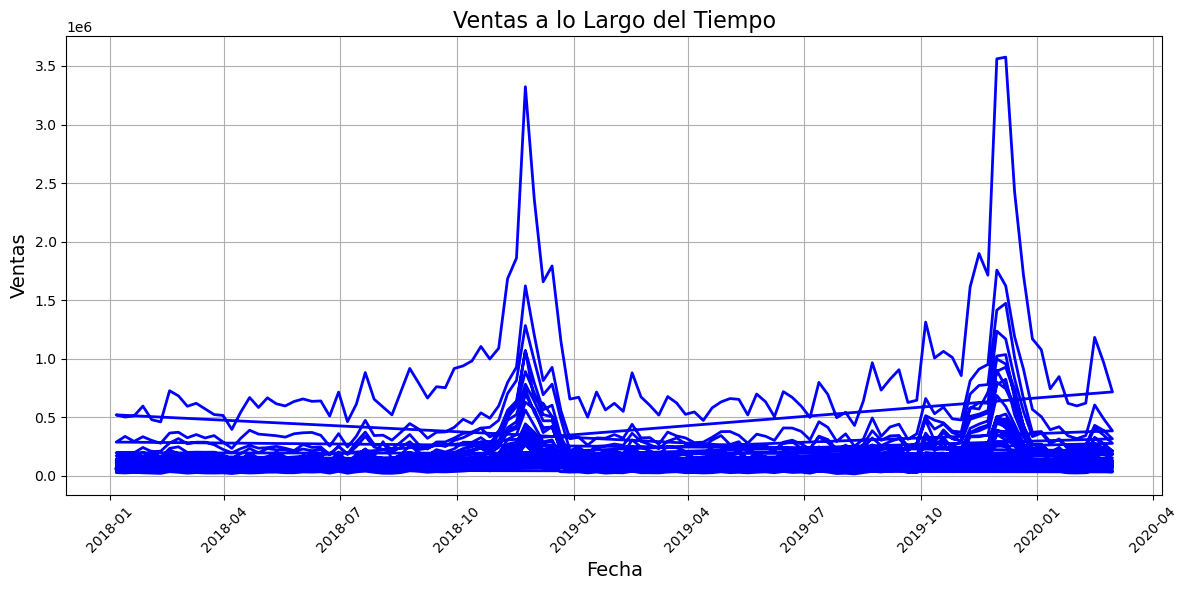

In [18]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
plt.plot(df['Calendar_Week'], df['Sales'], color='blue', linewidth=2)

# Título y etiquetas
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Mejorar la visualización de las fechas en el eje x
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Gráfico de Dispersión: Ventas vs Overall_Views

Este gráfico te ayudará a visualizar la relación entre las ventas y las vistas generales 

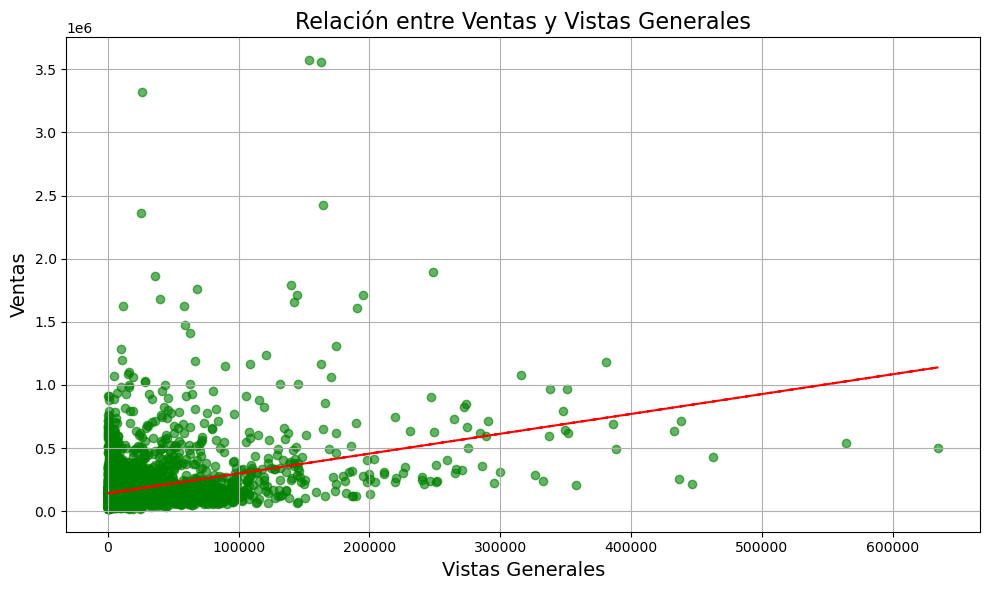

In [19]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df['Overall_Views'], df['Sales'], alpha=0.6, color='green')

# Título y etiquetas
plt.title("Relación entre Ventas y Vistas Generales", fontsize=16)
plt.xlabel("Vistas Generales", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Añadir una línea de tendencia (opcional)
z = np.polyfit(df['Overall_Views'], df['Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Overall_Views'], p(df['Overall_Views']), "r--")

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


### Crear el Gráfico de Dispersión: Ventas vs Email_Impressions

A continuación, crearás un gráfico de dispersión para visualizar la relación entre las Ventas y las Impresiones por Email. Además, agregarás una línea de tendencia para facilitar la interpretación

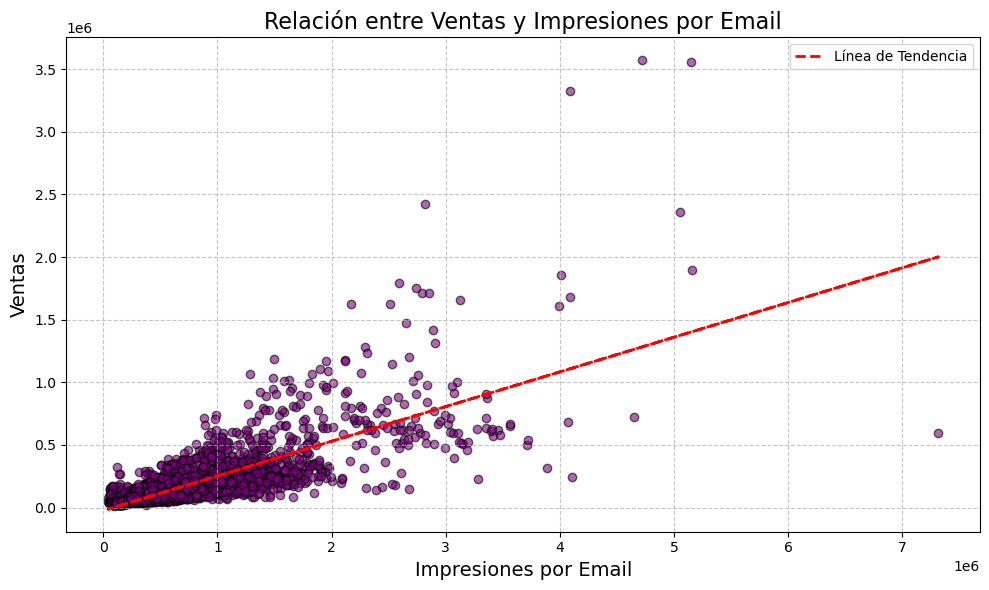

In [23]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df['Email_Impressions'], df['Sales'], alpha=0.6, color='purple', edgecolor='k')

# Título y etiquetas
plt.title("Relación entre Ventas y Impresiones por Email", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Añadir una línea de tendencia
# Asegurarse de que no hay valores NaN en las columnas utilizadas
df_clean = df[['Email_Impressions', 'Sales']].dropna()

# Calcular la línea de tendencia
z = np.polyfit(df_clean['Email_Impressions'], df_clean['Sales'], 1)
p = np.poly1d(z)
plt.plot(df_clean['Email_Impressions'], p(df_clean['Email_Impressions']), "r--", linewidth=2, label='Línea de Tendencia')

# Añadir leyenda
plt.legend()

# Mejorar la visualización de los ejes
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Manejar Valores  Atípicos

Es posible que algunos registros tengan valores atípicos en Email_Impressions o Sales. Ya manejamos esto al crear df_clean para la línea de tendencia, pero es recomendable revisar y limpiar los datos según sea necesario.


* Puntos de Dispersión (scatter): Cada punto representa una observación de Email_Impressions y Sales. La posición en el eje X indica las impresiones por email, y la posición en el eje Y indica las ventas correspondientes.

* Línea de Tendencia (trend line): Esta línea muestra la relación general entre Email_Impressions y Sales. Una pendiente positiva indicaría que a mayores impresiones por email, mayores 
ventas, mientras que una pendiente negativa sugeriría lo contrario.

* Transparencia (alpha): Ayuda a visualizar mejor las áreas con alta densidad de puntos, evitando que los puntos se solapen excesivamente

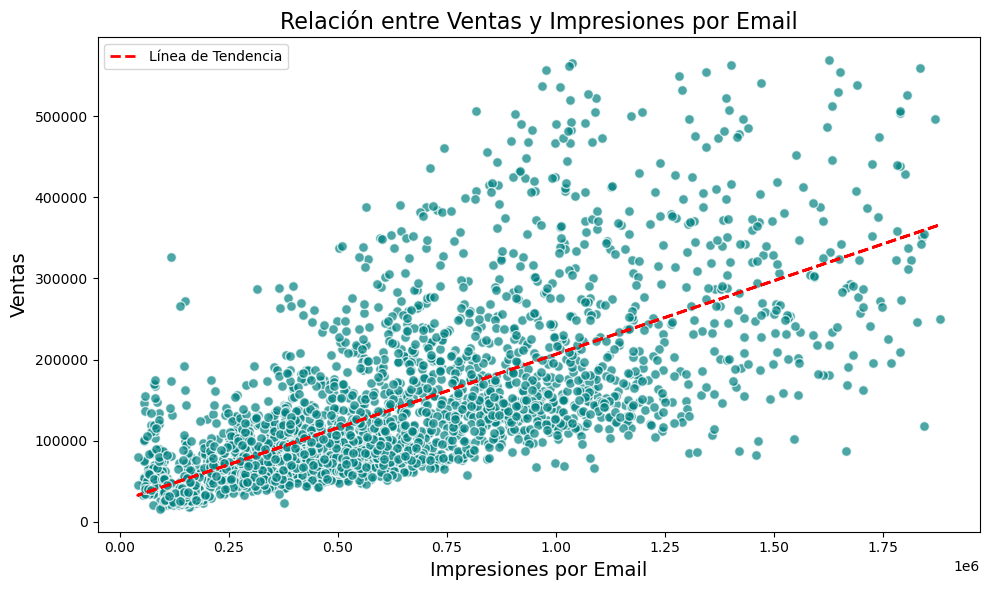

In [27]:
# 1. Manejar valores atípicos
upper_limit_email = df['Email_Impressions'].quantile(0.99)
upper_limit_sales = df['Sales'].quantile(0.99)
df = df[(df['Email_Impressions'] <= upper_limit_email) & (df['Sales'] <= upper_limit_sales)]

# 2. Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Email_Impressions'], df['Sales'], alpha=0.7, color='teal', edgecolor='white',s=50)
plt.title("Relación entre Ventas y Impresiones por Email", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# 3. Añadir línea de tendencia
z = np.polyfit(df['Email_Impressions'], df['Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Email_Impressions'], p(df['Email_Impressions']), "r--", linewidth=2, label='Línea de Tendencia')

plt.legend()
plt.grid(True, linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()


### Gráfico de Barras: Vistas por División

Comparar las vistas totales por cada división puede ser útil para identificar qué divisiones están generando más tráfico.

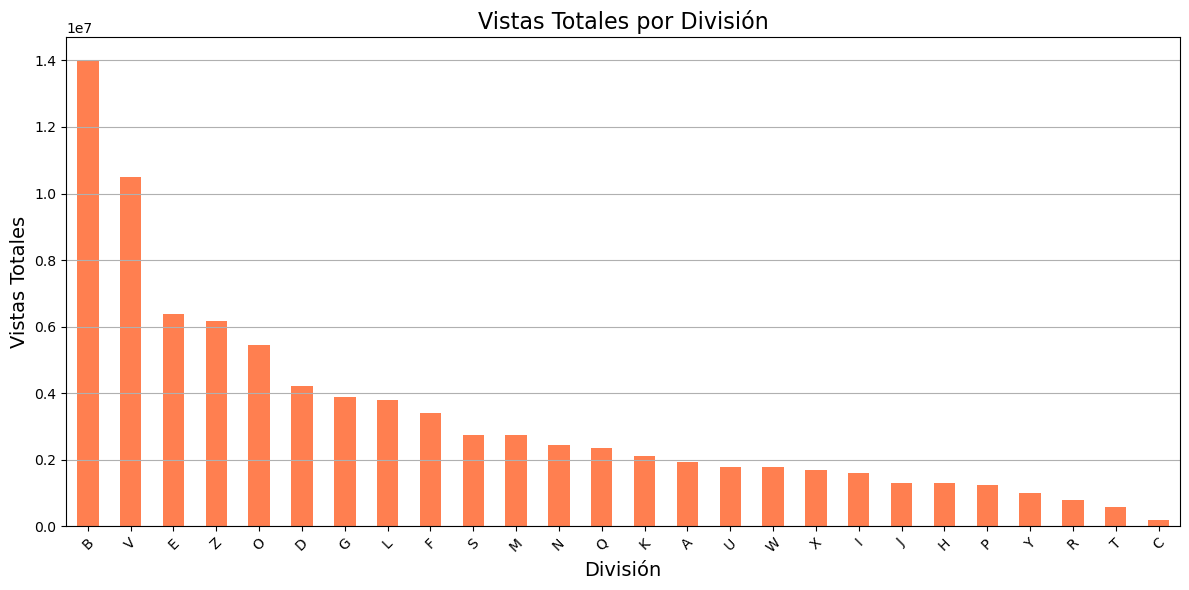

In [21]:
# Agrupar por División y sumar las vistas
vistas_por_division = df.groupby('Division')['Overall_Views'].sum().sort_values(ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
vistas_por_division.plot(kind='bar', color='coral')

# Título y etiquetas
plt.title("Vistas Totales por División", fontsize=16)
plt.xlabel("División", fontsize=14)
plt.ylabel("Vistas Totales", fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Gráfico de Pastel: Proporción de Impresiones por Fuente

Visualizar cómo se distribuyen las impresiones entre diferentes fuentes (Google, Email, Facebook, Affiliate)

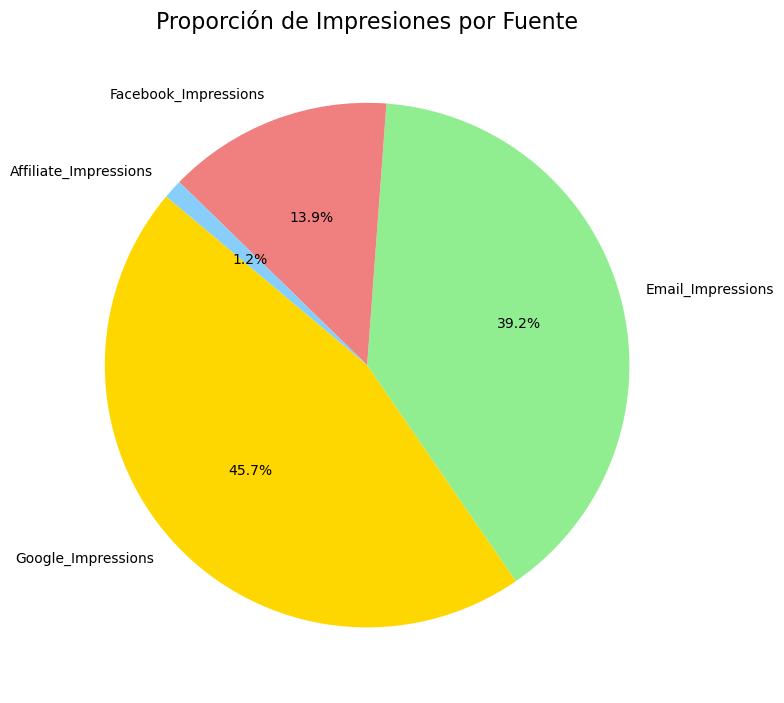

In [22]:
# Calcular las sumas de impresiones por fuente
impresiones = df[['Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']].sum()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
impresiones.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Título
plt.title("Proporción de Impresiones por Fuente", fontsize=16)

# Eliminar el eje y para una mejor visualización
plt.ylabel('')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Histograma: Distribución de Ventas

Este gráfico te permitirá ver la distribución de las ventas y entender su frecuencia.

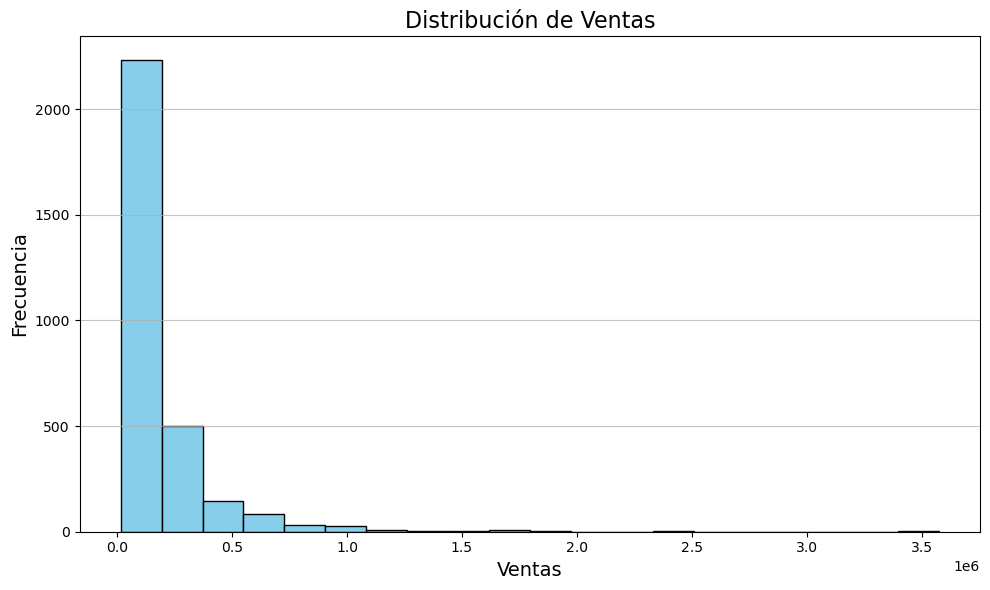

In [20]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')

# Título y etiquetas
plt.title("Distribución de Ventas", fontsize=16)
plt.xlabel("Ventas", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [2]:
path = '../data/kaggle/vgchartz-2024.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
